In [22]:
# Sphere-Plane NN model
## https://www.adeveloperdiary.com/data-science/machine-learning/understand-and-implement-the-backpropagation-algorithm-from-scratch-in-python/

import matplotlib.pyplot as plt 
from math import exp
from random import seed
from random import random
from random import randint
import matplotlib.lines as lines 

import math
 
# Initialize a network


class neuron_s():
    
    def __init__(self, n_inputs,c,o):
        self.mode = "C"
        self.outlayer = o
        self.inputs = [0 for _ in range(n_inputs)]
        self.weights = [random() for _ in range(n_inputs)]
        s1 = sum([x*x for x in self.weights])
        s2 = math.sqrt(s1)
        self.weights = [x /s2 for x in self.weights ]

        self.delta = 0
        self.output = 0
        self.A = .1 + 0.6*random()
        self.R = .1 + 0.6*random()
        self.C = c
        
    def copy (self):
        new_neuron = neuron_s(len(self.inputs), self.C, self.outlayer)
        new_neuron.inputs = self.inputs.copy()
        new_neuron.weights = self.weights.copy()
        new_neuron.delta = self.delta
        new_neuron.output = self.output
        new_neuron.A = self.A
        new_neuron.R = self.R
        return new_neuron
    
    def activate(self):
        N = len(self.weights)
        y1 = sum([self.inputs[i]* self.inputs[i] for i in range(N) ])
        y2 = sum([self.inputs[i]* self.weights[i] for i in range(N) ])
        activation = - (y1 - 2*(self.A + self.R)*y2 + self.A*self.A + 2*self.A*self.R)
        #print (self.weights, "C:", self.weights[0]*(self.A +self.R), self.weights[1]*(self.A +self.R), activation)
        return activation
    
    def transfer(self,activation):
        self.output = 1.0 / (1.0 + exp(-.5*activation)) 
        return self.output

    def transfer_derivative(self):
        return .5*self.output * (1.0 - self.output)

    # Calculate the derivative of the activation function
    def activation_derivate_by_input(self, idx):
        return 2*self.inputs[idx] - 2*(self.A + self.R)*self.weights[idx]

    def activation_derivate_by_weight(self, idx):
        return  - 2*(self.A + self.R)*self.inputs[idx]

    def activation_derivate_by_A(self):
        N = len(self.inputs)
        s1 = sum([self.inputs[i]*self.weights[i] for i in range(N)])
        return -2*s1 + 2*(self.A + self.R)

    def activation_derivate_by_R(self):
        N = len(self.inputs)
        s1 = sum([self.inputs[i]*self.weights[i] for i in range(N)])
        return -2*s1 + 2*(self.A)
    
    def print_neuron_param(self):
        print(self.weights, self.A, self.R,self.C)

    def update_weights(self, l_rate):
        for j in range(len(self.weights)):
            self.weights[j] -= l_rate * self.delta * self.activation_derivate_by_weight(j)
        self.A -= l_rate * self.delta*self.activation_derivate_by_A()
        self.R -= 1.5*l_rate * self.delta*self.activation_derivate_by_R()
        s1 = sum([x*x for x in self.weights])
        s2 = math.sqrt(s1)
        self.weights = [x /s2 for x in self.weights ]
        
    def draw_neuron(self, axes, plt):
        cl = 'blue' if self.C > 0 else 'red'
        cc = plt.Circle( ((self.A+self.R)*self.weights[0], (self.A+self.R)*self.weights[1] ), self.R ,fill = False,color=cl )   
        axes.add_artist( cc)    
        
        
class neuron_l():
    
    def __init__(self, n_inputs,o):
        self.mode = "L"
        self.outlayer = o
        self.inputs = [0 for _ in range(n_inputs)]
        self.weights = [random() for _ in range(n_inputs)]
        self.delta = 0
        self.output = 0
        self.A = random()
        
    def copy (self):
        new_neuron = neuron_s(len(self.inputs),  self.outlayer)
        new_neuron.inputs = self.inputs.copy()
        new_neuron.weights = self.weights.copy()
        new_neuron.delta = self.delta
        new_neuron.output = self.output
        new_neuron.A = self.A
        return new_neuron

    def activate(self):
        N = len(self.weights)
        y1 = sum([self.inputs[i]* self.weights[i] for i in range(N) ])
        activation = (y1  + self.A) 
        return activation
    
    def transfer(self,activation):
        self.output = 1.0 / (1.0 + exp(-activation)) 
        return self.output

    def transfer_derivative(self):
        return self.output * (1.0 - self.output)

    # Calculate the derivative of the activation function
    def activation_derivate_by_input(self, idx):
        return self.weights[idx]

    def activation_derivate_by_weight(self, idx):
        return  self.inputs[idx]

    def activation_derivate_by_A(self):
        return 1
    
    def print_neuron_param(self):
        print(self.weights, self.A)

    def update_weights(self, l_rate):
        for j in range(len(self.weights)):
            self.weights[j] += l_rate * self.delta * self.activation_derivate_by_weight(j)
        self.A += l_rate * self.delta*self.activation_derivate_by_A()

    def draw_neuron(self, axes, plt):
        cl = 'black"'
        x1 = -2
        y1 = (self.A - self.weights[0]*x1) / self.weights[1]
        x2 = 8
        y2 = (self.A - self.weights[0]*x2) / self.weights[1]
        line   = plt.Line2D([x1,x2],[y1,y2],mfc ='green')
        print ("line",[x1,x2],[y1,y2],"w",self.weights)
        plt.gca().add_line(line)    
        
        
class SSNN_network():
    
    def __init__ (self):
        self.layers = []
        self.outputs = None
        self.HL = 0
        self.OL = 0

    def init (self, n_inputs, hidden_nmode, outputs_nmode, outputs_category):
        self.layers = []
        n_outputs = len(outputs_nmode)
        n_hiddens = len(hidden_nmode)
        self.outputs = outputs_category
        self.HL = -1
        self.OL = 0
        self.layers.append([])
        if n_hiddens > 0:
            self.layers.append([])
            self.HL = 0
            self.OL = 1
            for i in range(n_hiddens):
                if hidden_nmode[i] == 'S': 
                    self.layers[self.HL].append(neuron_s(n_inputs,0,False))
                else:
                    self.layers[self.HL].append(neuron_l(n_inputs,False))
            for i in range(n_outputs):
                if outputs_nmode[i] == 'S': 
                    self.layers[self.OL].append(neuron_s(n_hiddens,outputs_category[i],True))
                else:
                    self.layers[self.OL].append(neuron_l(n_hiddens,True))
        else:
            for i in range(n_outputs):
                if outputs_nmode[i] == 'S': 
                    self.layers[self.OL].append(neuron_s(n_inputs,outputs_category[i],True))
                else:
                    self.layers[self.OL].append(neuron_l(n_inputs,True))
                    
                    
                    
    def copy(self):
        new_network = SSNN_network()
        new_network.outputs = self.outputs.copy()
        new_network.HL = self.HL
        new_network.OL = self.OL
        new_network.HL = self.HL
        for i in range(len(self.layers)):
            new_network.layers.append([])            
            for neuron in self.layers[i]:
                new_network.layers[i].append(neuron.copy())
        return new_network
        
    def forward_propagate(self, row):
        for neuron in self.layers[0]:
            for i in range(len(row)-1):
                neuron.inputs[i] = row[i]

        for l in range(len(self.layers)):
            layer = self.layers[l]
            for neuron in layer:
                activation = neuron.activate()
                neuron.transfer(activation)
            if l < self.OL:
                for neuron in self.layers[l+1]:
                    for i in range(len(self.layers[l])):
                        neuron2 = self.layers[l][i]
                        neuron.inputs[i] = neuron2.output

            outputs = []
            for neuron in self.layers[self.OL]:
                outputs.append(neuron.output)
        return outputs
     
    
    def backward_propagate_error(self, expected):
        for i in reversed(range(len(self.layers))):
            layer = self.layers[i]
            errors = list()
            if i != self.OL:
                for j in range(len(layer)):
                    error = 0.0
                    for neuron in self.layers[i + 1]:
                        error += (neuron.activation_derivate_by_input(j) * neuron.delta)
                    errors.append(error)
            else:
                for j in range(len(layer)):
                    neuron = layer[j]
                    #exp = expected[j] if neuron["C"] == '0' else (1-expected[j])
                    exp = expected[j] 
                    errors.append(exp - neuron.output)
            for j in range(len(layer)):
                neuron = layer[j]
                neuron.delta = errors[j] * neuron.transfer_derivative()
                
    def test_update_weights(self, l_rate, train):
        #print ("Update weights test")
        acc = self.test_network(train)
        err = self.get_error(train)
        X = [0]
        YE = [err]
        YA = [acc]
        #print ("base:",acc,err)
        for l in [0.1 + 0.1*x for x in range(20)]:
            networks = self.copy()
            networks.update_weights(l)
            acc = networks.test_network(train)
            err = networks.get_error(train)
            #print (l,":",acc,err)
            X.append(l)
            YE.append(err)
            YA.append(acc)

        plt.plot(X,YE)
        plt.show()
        plt.plot(X,YA)
        plt.show()
                
            
    def get_error(self, train):
        train = self.normalize(train) 
        sum_error = 0
        n_outputs = len(self.outputs)
        for row in train:
            voutputs = self.forward_propagate( row)
            expected = [0 for i in range(n_outputs)]
            for i in range(n_outputs):
                if self.outputs[i] == row[-1]:
                    expected[i] = 1
            sum_error += sum([(expected[i]-voutputs[i])**2 for i in range(len(expected))])
        return sum_error

    def test_network(self, train):
        train = self.normalize(train)
        n_outputs = len(self.outputs)
        dbok = 0
        for row in train:
            voutputs = self.forward_propagate( row)
            expected = [0 for i in range(n_outputs)]
            idx = voutputs.index(max(voutputs))
            if self.outputs[idx] == row[-1]:
                dbok += 1
            #print (row, voutputs)
        #print ("accuray:", dbok / len(train))
        return dbok / len(train)
    
    def update_weights(self, l_rate):
        for i in range(len(self.layers)):
            for neuron in self.layers[i]:
                neuron.update_weights(l_rate);

    def train_network(self, train, l_rate, n_epoch, drf = 5):
        n_outputs = len(self.outputs)
        self.draw_network( train)
        self.print_network_param()
        for epoch in range(n_epoch):
            sum_error = 0
            for row in train:
                voutputs = self.forward_propagate( row)
                expected = [0 for i in range(n_outputs)]
                for i in range(n_outputs):
                    if self.outputs[i] == row[-1]:
                        expected[i] = 1
                sum_error += sum([(expected[i]-voutputs[i])**2 for i in range(len(expected))])
                self.backward_propagate_error( expected)
                if random() < 0.1:
                    self.test_update_weights(l_rate,train)

                self.update_weights(l_rate)
            print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
            if epoch % drf == 0:
                self.draw_network( train)
                self.print_network_param()
              
            
    def draw_network (self, train):
        figure, axes = plt.subplots()
        axes.set_aspect( 1 )
        for i in range(len(self.layers[self.OL])):
            sn = self.layers[self.OL][i]
            sn.draw_neuron(axes, plt)
        for i in range(len(train)):
            cl = 'blue' if train[i][2] > 0 else 'red'
            cc = plt.Circle( (train[i][0], train[i][1] ), 0.1 ,fill = True, color =cl )   
            axes.add_artist( cc)        

        plt.xlim( -2 ,8 ) 
        plt.ylim( -2 , 8) 
        plt.title( 'Circle' ) 
        plt.show()            
                
    def print_network_param(self):
        for layer in self.layers:
            print ("Layer ---------------")
            for neuron in layer:
                neuron.print_neuron_param()
                
    def test_network(self, train):
        print (self.outputs)
        n_outputs = len(self.outputs)
        dbok = 0
        for row in train:
            voutputs = self.forward_propagate( row)
            expected = [0 for i in range(n_outputs)]
            idx = voutputs.index(max(voutputs))
            if self.outputs[idx] == row[-1]:
                dbok += 1
            #print (row, voutputs)
        #print ("accuray:", dbok / len(train))
        return (dbok / len(train))
        
    def normalize (self, train):
        mx = []
        mn = []
        for i in range(len(train[0])-1):
            mx.append(max([x[i] for x in train ]))
            mn.append(min([x[i] for x in train ]))
        for row in train:
            for i in range(len(row)-1):
                row[i] = (row[i] - mn[i]) / (mx[i] - mn[i]) 
        return train
    
        
    

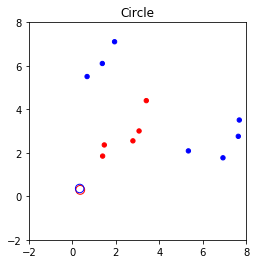

Layer ---------------
[0.7706624421586056, 0.6372435956885982] 0.2615538450366491 0.20310374282717825 0
[0.6786695864925524, 0.7344437298867954] 0.29446945480237113 0.1961117066833587 1
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


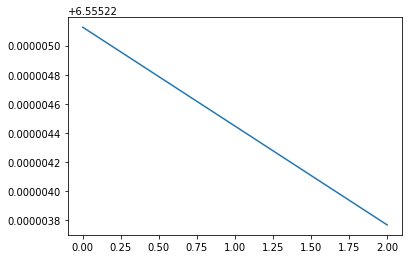

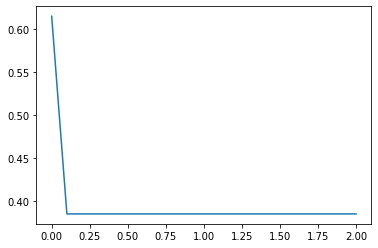

[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


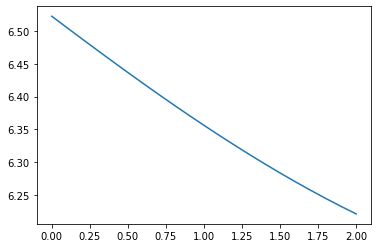

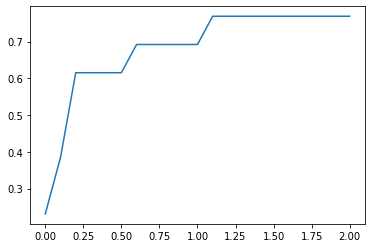

>epoch=0, lrate=0.050, error=9.630


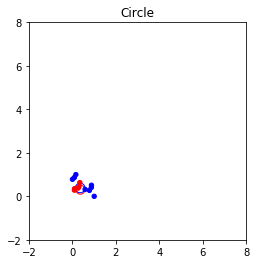

Layer ---------------
[0.7703513097692296, 0.6376196825199426] 0.26912386424865253 0.2056556718168596 0
[0.6780869214252733, 0.7349817188148258] 0.30306088468965525 0.22075297995022186 1
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


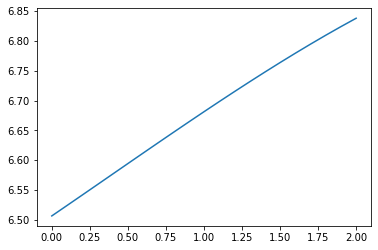

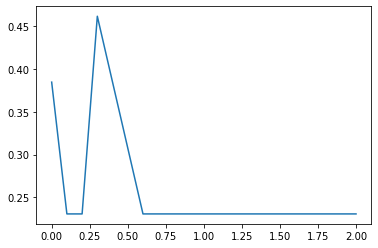

>epoch=1, lrate=0.050, error=6.494
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


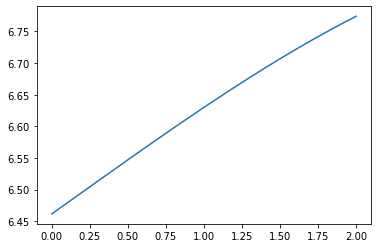

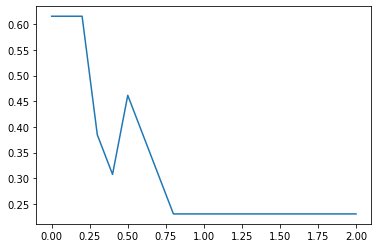

[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


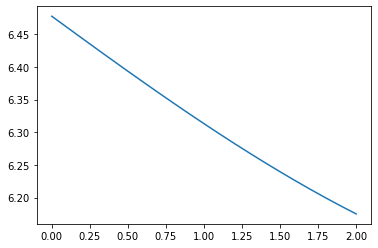

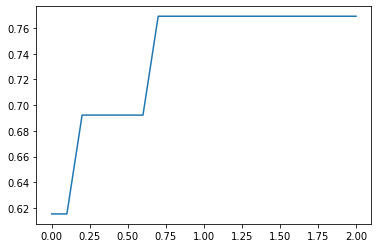

>epoch=2, lrate=0.050, error=6.451
>epoch=3, lrate=0.050, error=6.399
>epoch=4, lrate=0.050, error=6.347
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


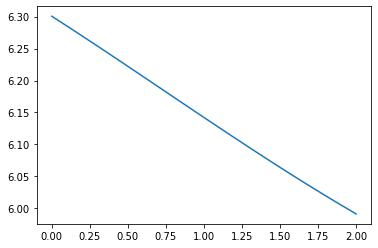

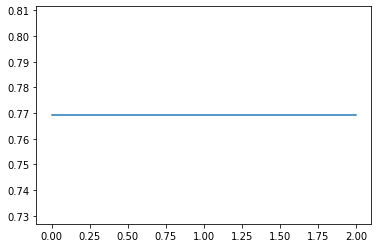

>epoch=5, lrate=0.050, error=6.295
>epoch=6, lrate=0.050, error=6.249
>epoch=7, lrate=0.050, error=6.202
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


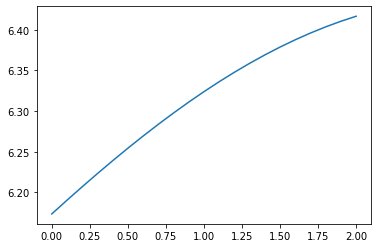

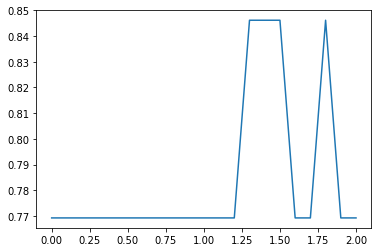

[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


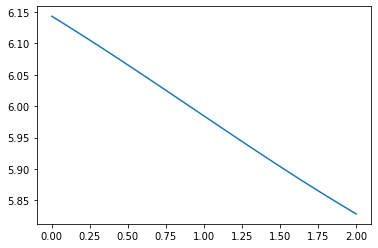

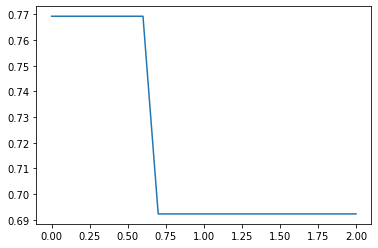

[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


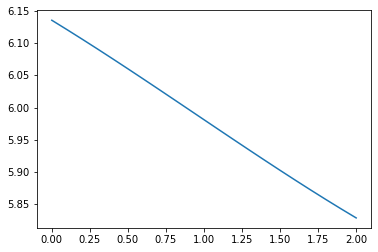

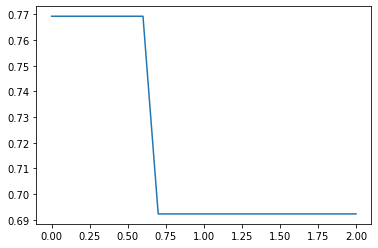

>epoch=8, lrate=0.050, error=6.157
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


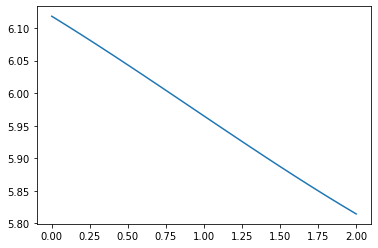

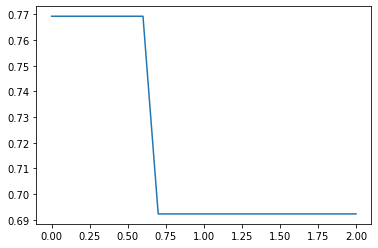

[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


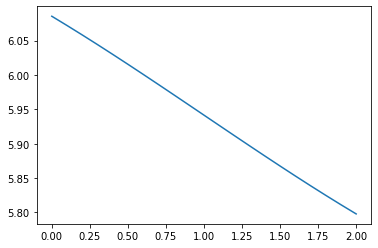

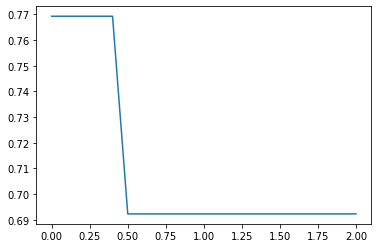

>epoch=9, lrate=0.050, error=6.107
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


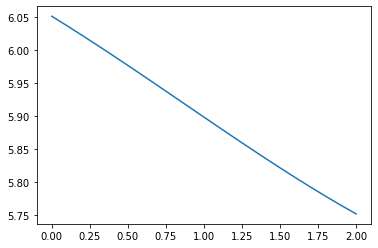

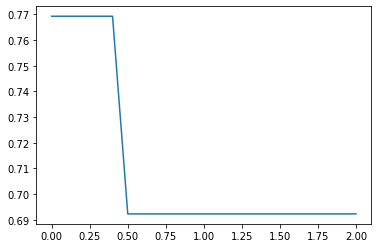

[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


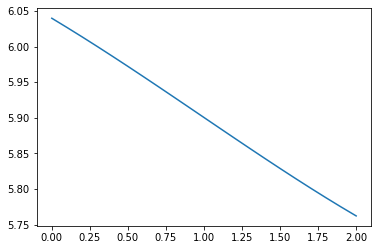

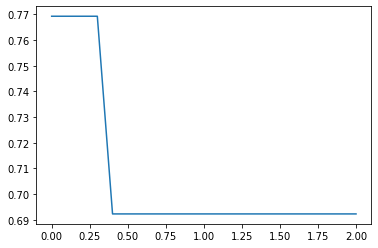

>epoch=10, lrate=0.050, error=6.065


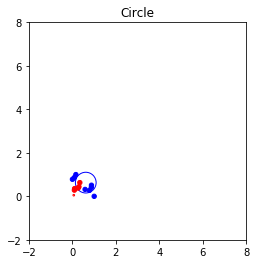

Layer ---------------
[0.76228579448923, 0.647240579321108] 0.11799702395968022 -0.03781161245427162 0
[0.6976026083662296, 0.7164848922347443] 0.4017165021879682 0.47680811920195654 1
>epoch=11, lrate=0.050, error=6.023
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


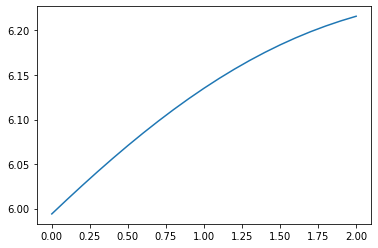

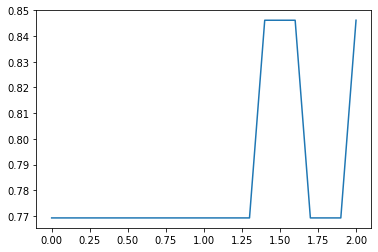

[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


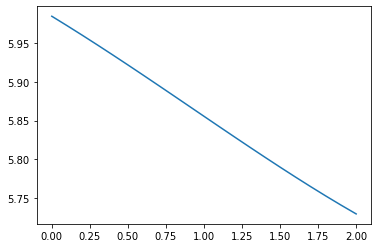

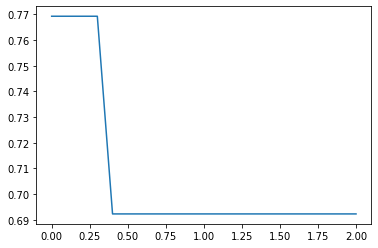

>epoch=12, lrate=0.050, error=5.989
>epoch=13, lrate=0.050, error=5.957
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


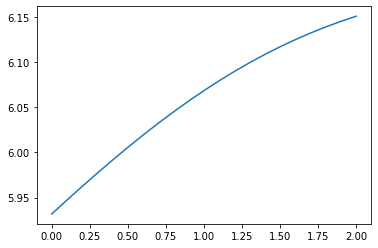

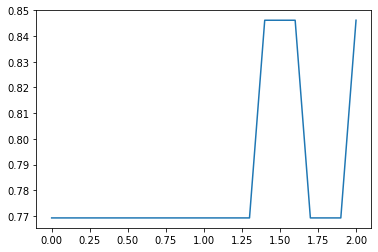

>epoch=14, lrate=0.050, error=5.929
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


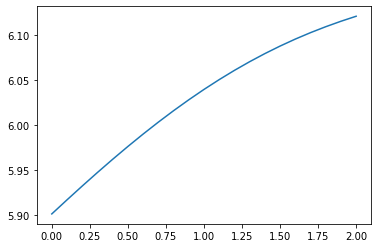

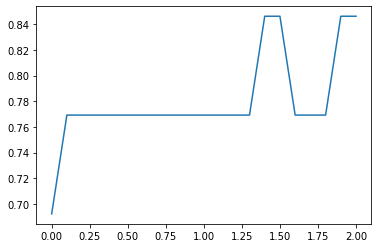

[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


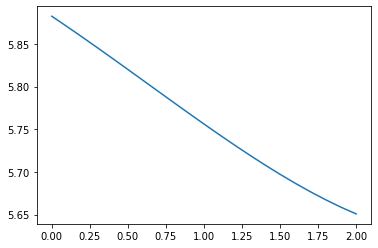

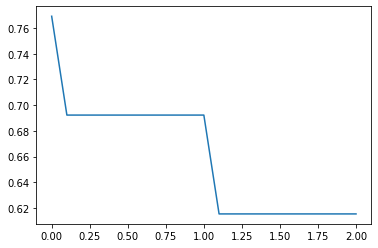

>epoch=15, lrate=0.050, error=5.900
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


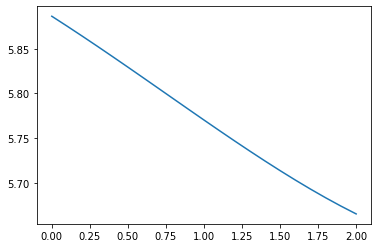

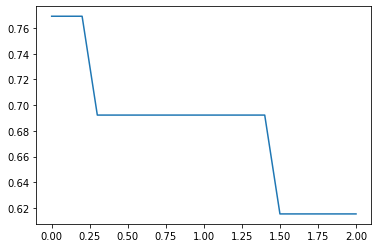

>epoch=16, lrate=0.050, error=5.868
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


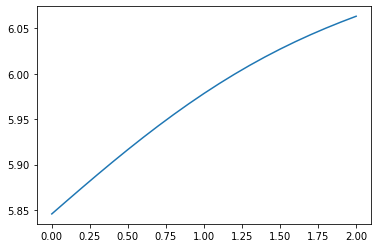

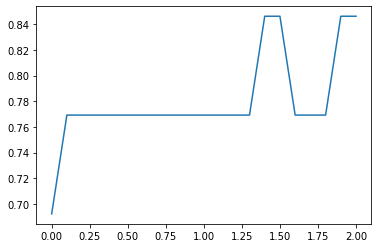

>epoch=17, lrate=0.050, error=5.846
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


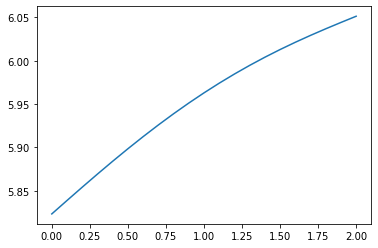

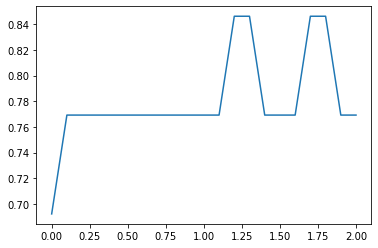

[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


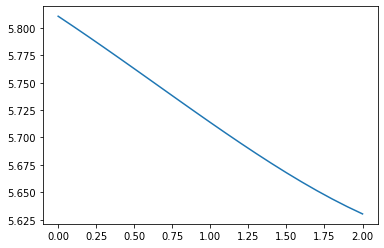

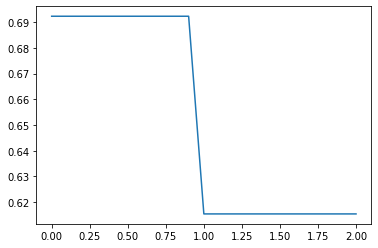

>epoch=18, lrate=0.050, error=5.817
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


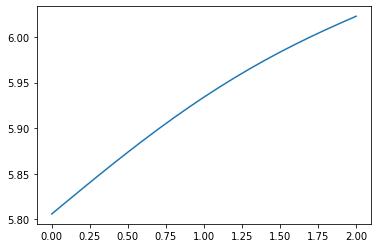

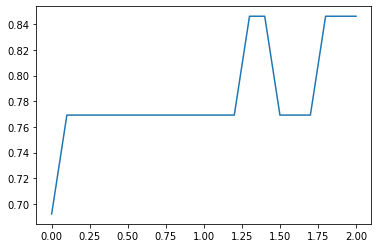

[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


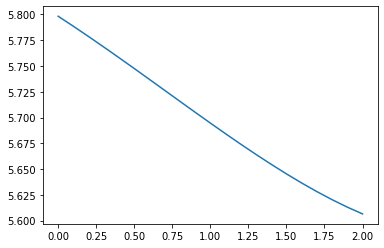

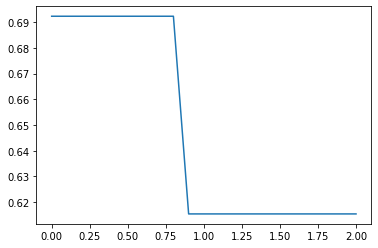

[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


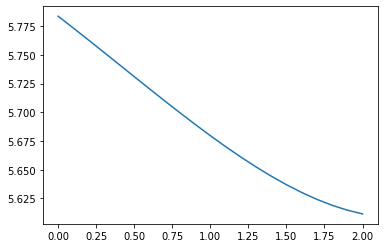

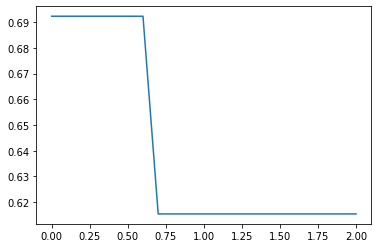

>epoch=19, lrate=0.050, error=5.799
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


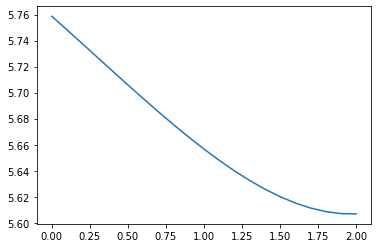

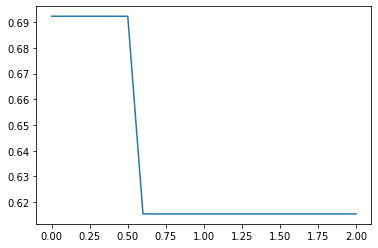

>epoch=20, lrate=0.050, error=5.773


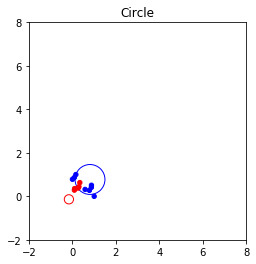

Layer ---------------
[0.7616936791549838, 0.6479372956817232] -0.0011839952798348417 -0.21216616956489676 0
[0.7218168604607654, 0.6920841133522456] 0.4309292603209657 0.687886995541889 1
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


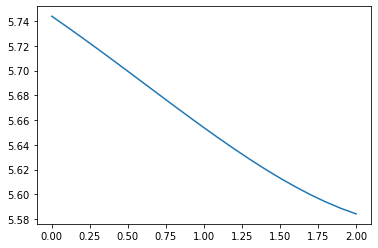

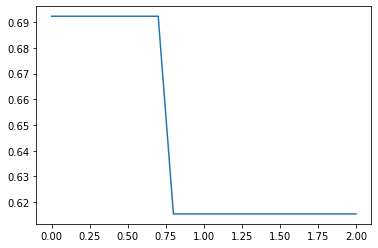

>epoch=21, lrate=0.050, error=5.743
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


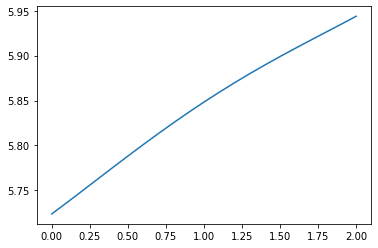

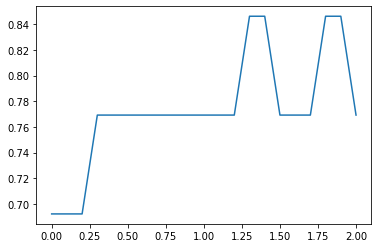

[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


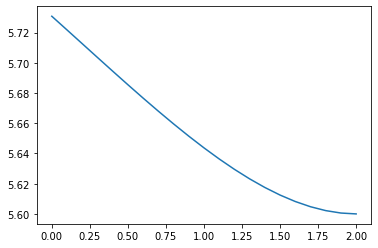

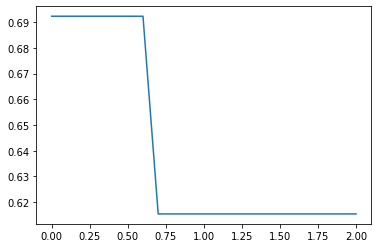

[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


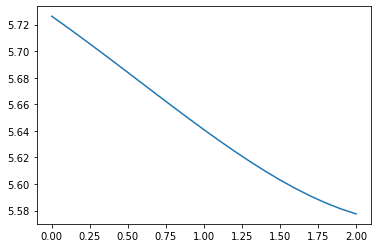

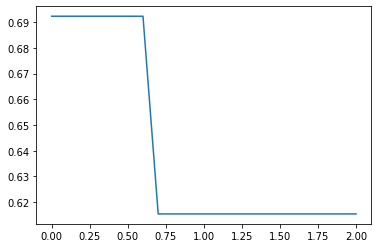

>epoch=22, lrate=0.050, error=5.724
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


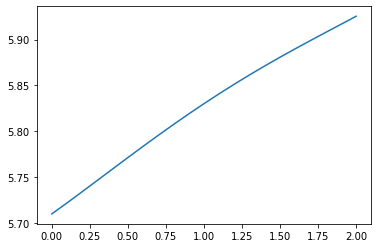

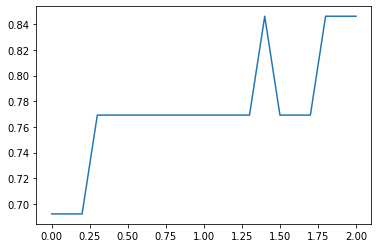

[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


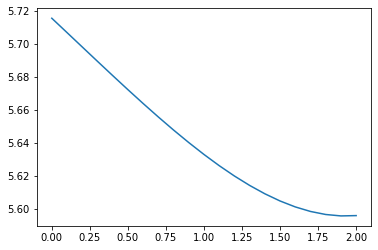

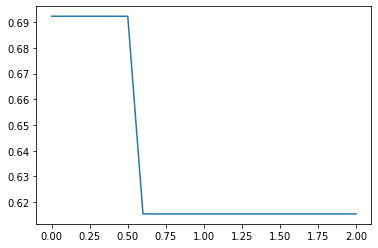

>epoch=23, lrate=0.050, error=5.715
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


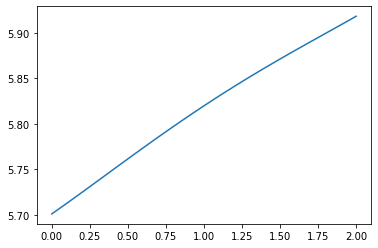

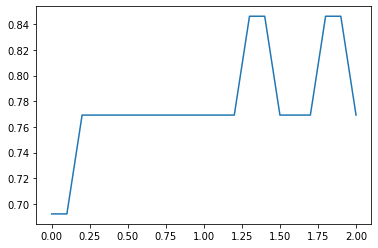

[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


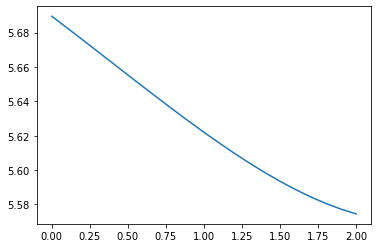

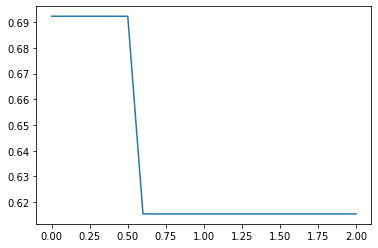

>epoch=24, lrate=0.050, error=5.702
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


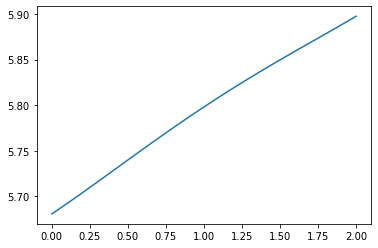

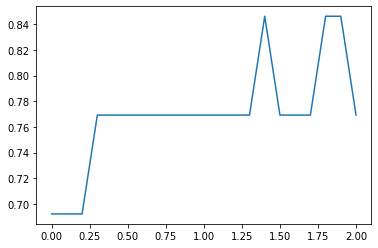

>epoch=25, lrate=0.050, error=5.688
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


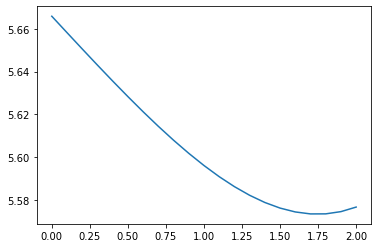

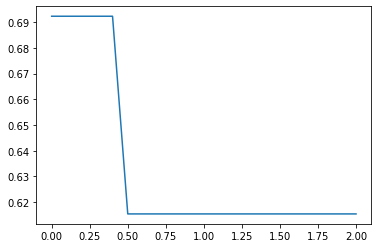

>epoch=26, lrate=0.050, error=5.666
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


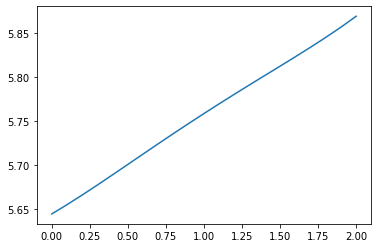

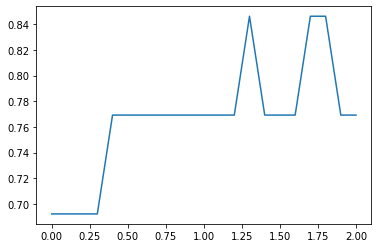

>epoch=27, lrate=0.050, error=5.654
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


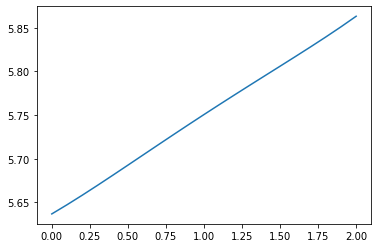

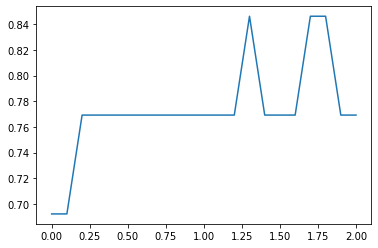

[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


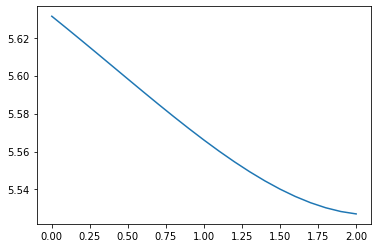

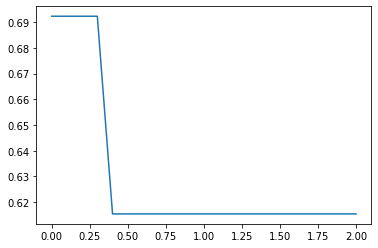

>epoch=28, lrate=0.050, error=5.638
>epoch=29, lrate=0.050, error=5.624
>epoch=30, lrate=0.050, error=5.607


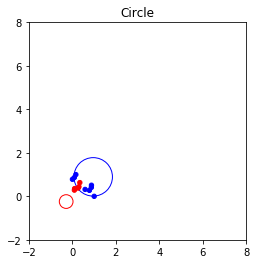

Layer ---------------
[0.7668173022657768, 0.6418654258844579] -0.06086763152826415 -0.3151090963901929 0
[0.7300171994477282, 0.6834287735459312] 0.4235659265560479 0.8848117000835893 1
>epoch=31, lrate=0.050, error=5.592
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


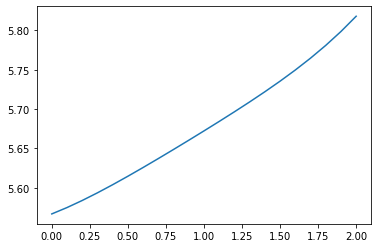

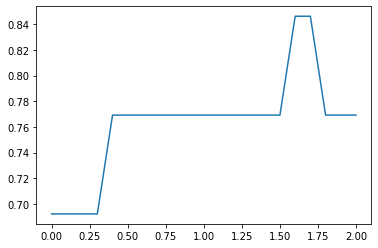

[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


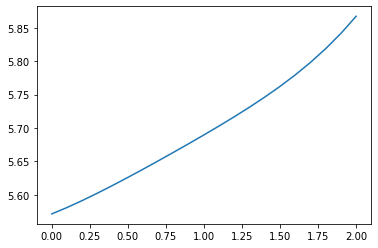

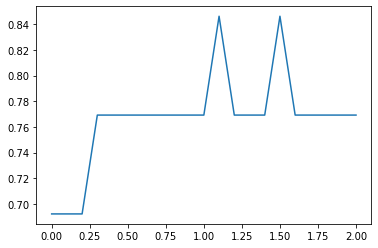

>epoch=32, lrate=0.050, error=5.580
>epoch=33, lrate=0.050, error=5.564
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


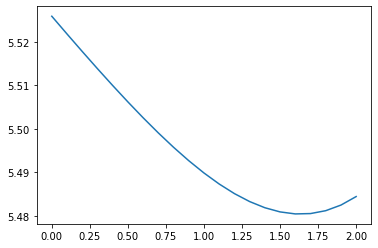

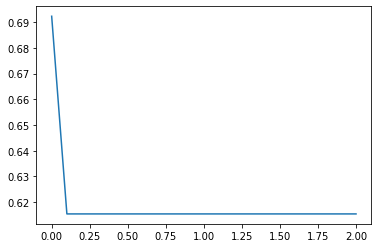

>epoch=34, lrate=0.050, error=5.549
>epoch=35, lrate=0.050, error=5.535
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


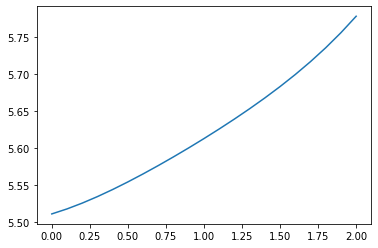

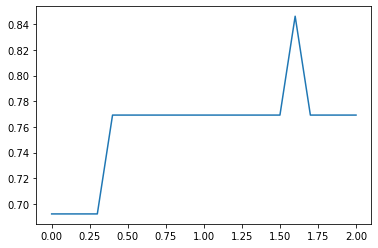

>epoch=36, lrate=0.050, error=5.526
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


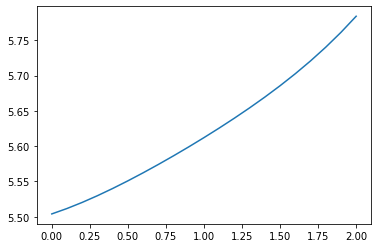

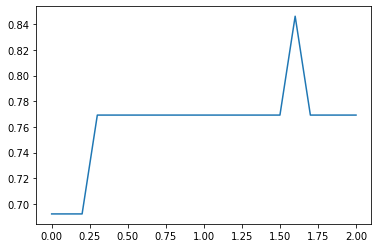

[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


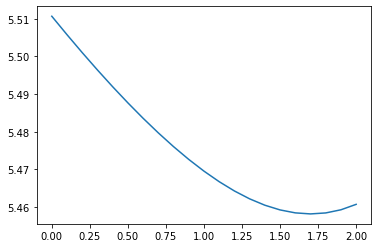

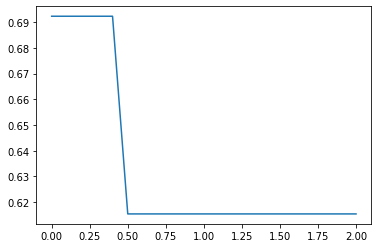

[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


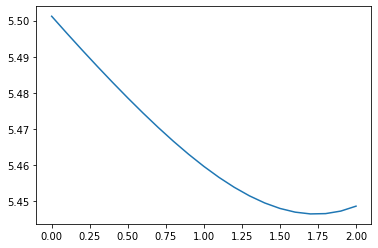

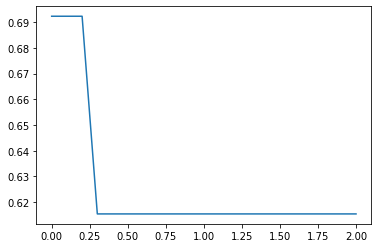

>epoch=37, lrate=0.050, error=5.510
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


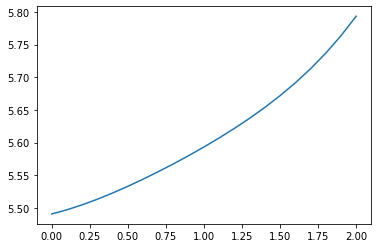

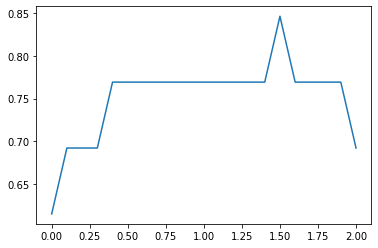

[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


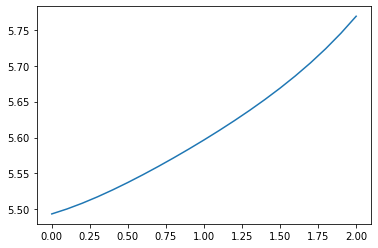

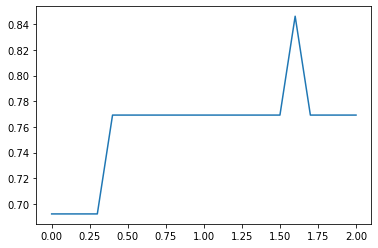

[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


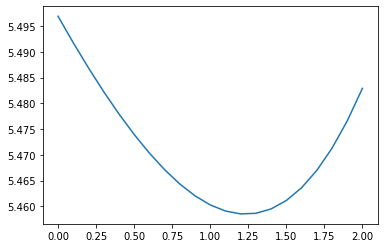

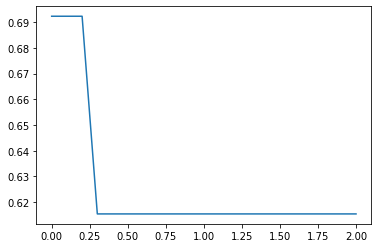

[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


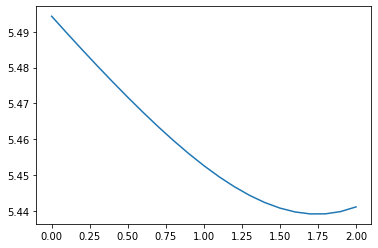

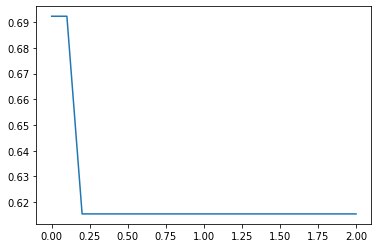

[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


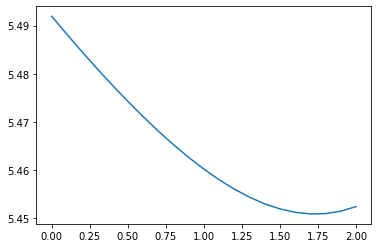

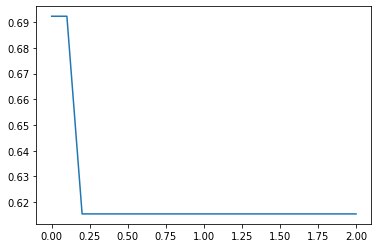

[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


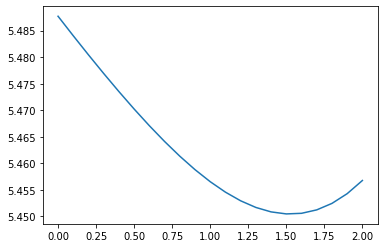

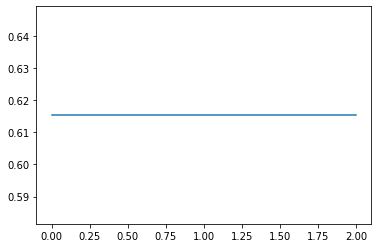

>epoch=38, lrate=0.050, error=5.496
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


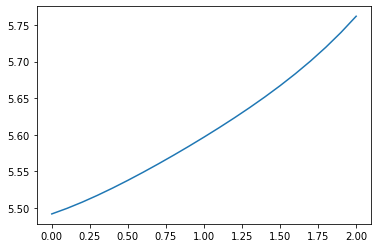

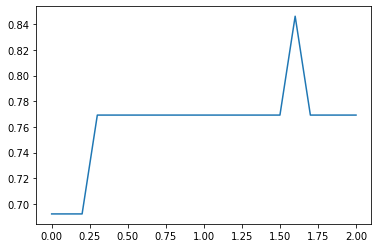

[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


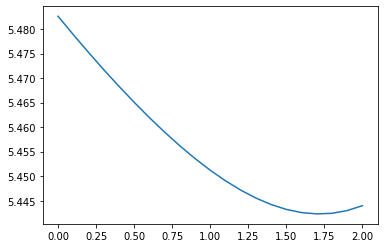

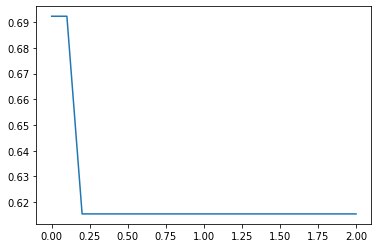

[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


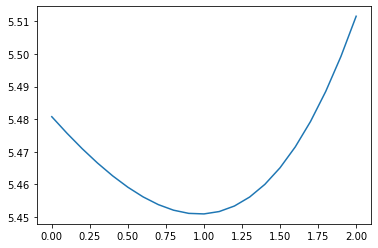

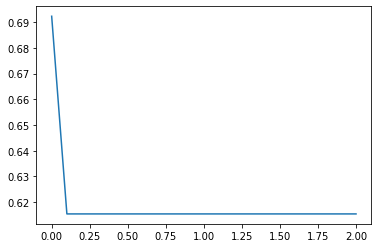

>epoch=39, lrate=0.050, error=5.501
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


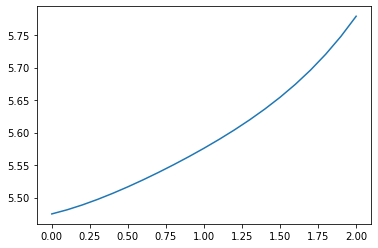

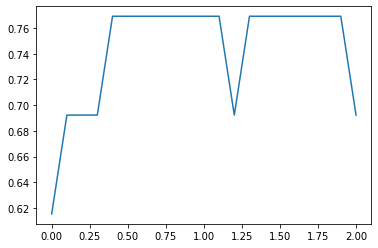

[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


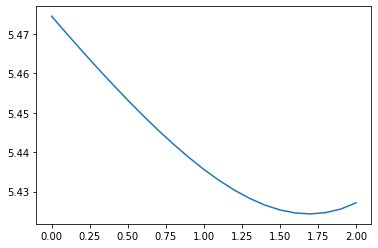

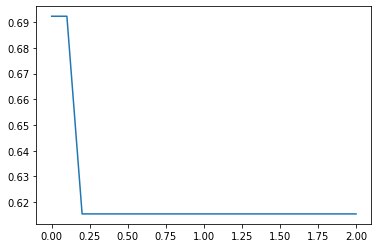

[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


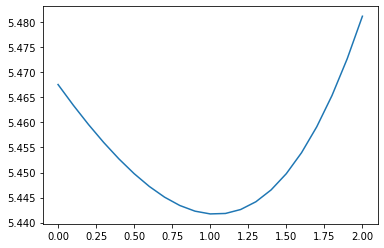

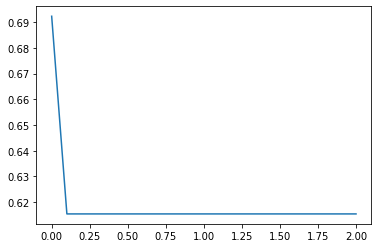

>epoch=40, lrate=0.050, error=5.483


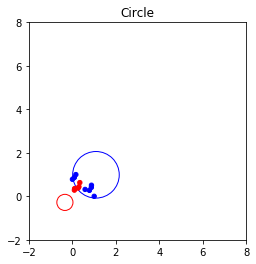

Layer ---------------
[0.777646670947392, 0.6287015628773628] -0.0743551710039049 -0.3710732824999707 0
[0.7379029205441427, 0.6749068675398293] 0.3950283671171824 1.0710369556954389 1
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


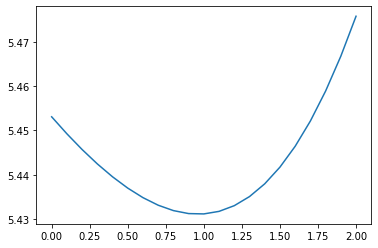

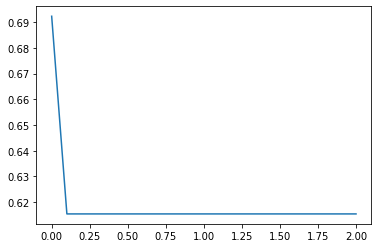

>epoch=41, lrate=0.050, error=5.477
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


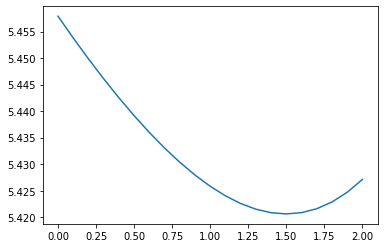

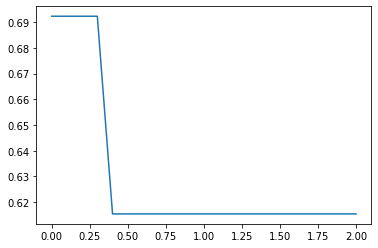

>epoch=42, lrate=0.050, error=5.463
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


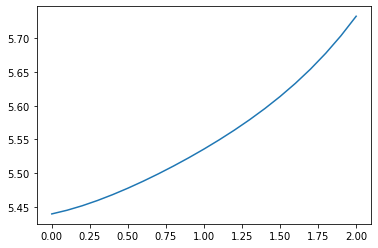

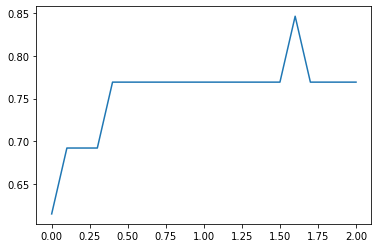

[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


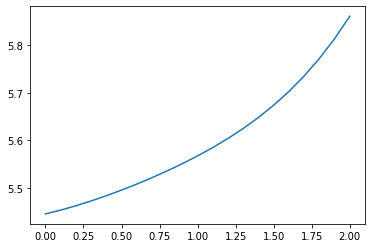

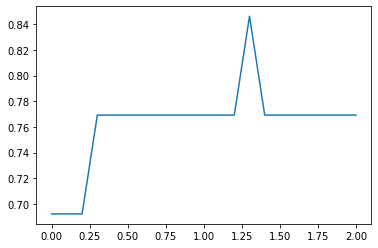

[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


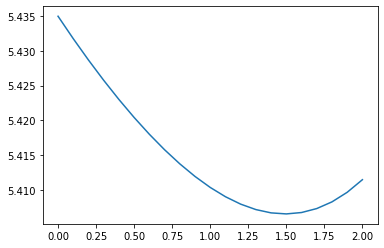

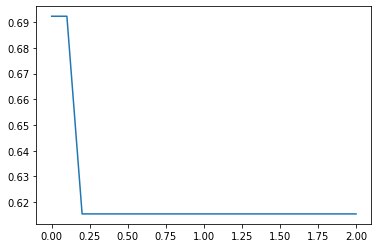

[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


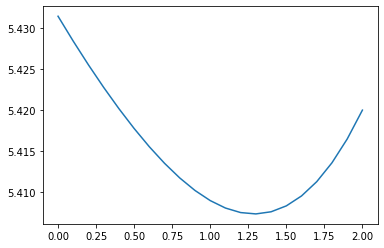

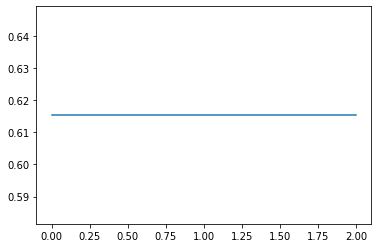

>epoch=43, lrate=0.050, error=5.457
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


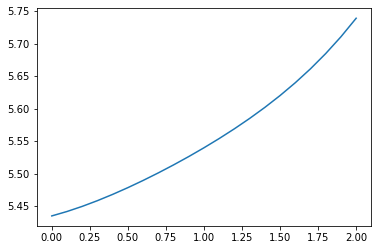

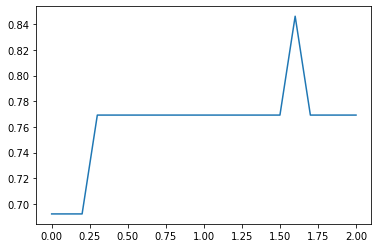

>epoch=44, lrate=0.050, error=5.451
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


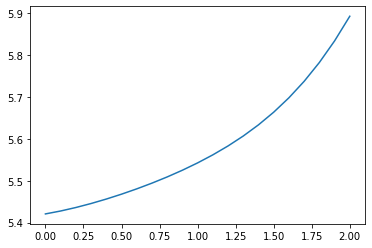

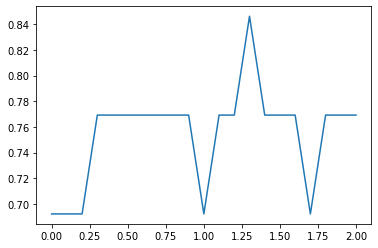

[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


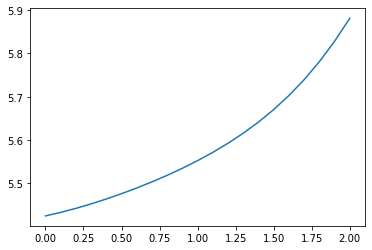

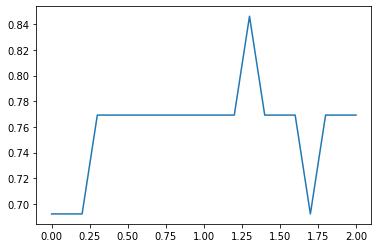

[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


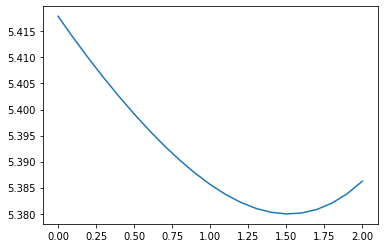

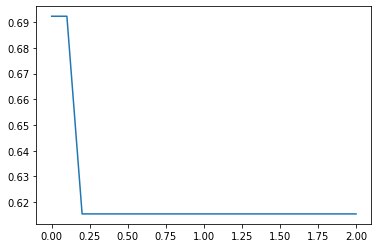

>epoch=45, lrate=0.050, error=5.432
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


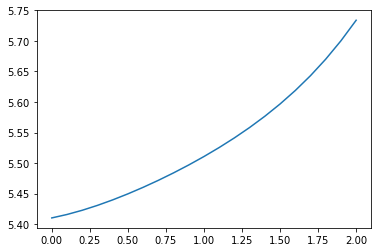

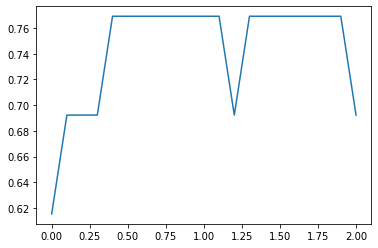

[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


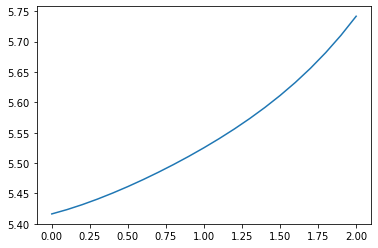

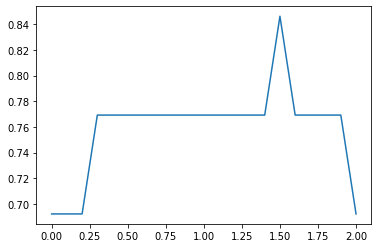

>epoch=46, lrate=0.050, error=5.434
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


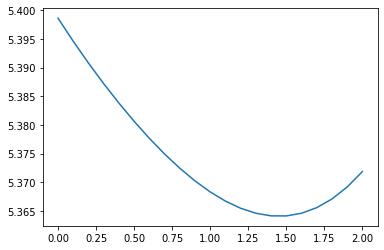

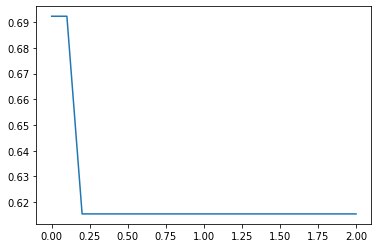

>epoch=47, lrate=0.050, error=5.408
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


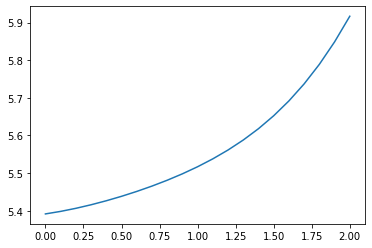

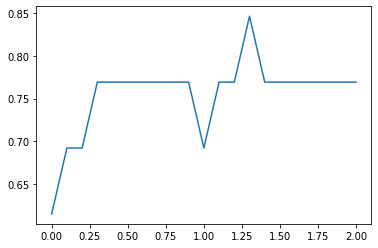

>epoch=48, lrate=0.050, error=5.407
>epoch=49, lrate=0.050, error=5.394


In [23]:
T = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1],
    [0.673756466,5.508563011,1],
    [1.373756466,6.108563011,1],
    [1.93756466,7.108563011,1] 
    ]
n_inputs = len(T[0]) - 1
network = SSNN_network()
network.init(n_inputs, [],['S','S'],[0,1])
#network = set_network_1(network)
#network.print_network_param()
network.train_network( T, 0.05, 50, 10)

In [ ]:
print ()